In [7]:
import numpy as np
#import scipy
#import pandas as pd
#import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2

ImportError: 
Importing the multiarray numpy extension module failed.  Most
likely you are trying to import a failed build of numpy.
If you're working with a numpy git repo, try `git clean -xdf` (removes all
files not under version control).  Otherwise reinstall numpy.

Original error was: libgfortran.so.4: cannot open shared object file: No such file or directory


## Exercise 1 – Model Learning

1. Load the data files ”Xtrain.txt” and ”Ytrain.txt”. They contain the training images as row vectors of pixel intensities and the ground truth annotation, respectively.
2. Split the data into two parts of (approximately) equal size. As the data file is in randomly shuffled order, you can split any way you like, e.g. first half/second half, or even/odd indices.
    - Xtrn/Y trn, which we will use for learning the model, and
    - Xval/Y val, which we will use as validation data.

In [ ]:
X = pd.read_csv("Xtrain.txt", sep=" ", header=None).as_matrix()
y = pd.read_csv("Ytrain.txt", sep=" ", header=None).as_matrix()

Xtest = pd.read_csv("Xtest.txt", sep=" ", header=None).as_matrix()
ytest = pd.read_csv("Ytest.txt", sep=" ", header=None).as_matrix()

Xval2 = pd.read_csv("Xval2.txt", sep=" ", header=None).as_matrix()
yval2 = pd.read_csv("Yval2.txt", sep=" ", header=None).as_matrix()

Xview = X.reshape((-1, 24, 24))
Xvalview = Xval2.reshape((-1, 24, 24))

mask = np.random.uniform(0,1,size=len(X))
mask = mask > mask.mean()

Xt = X[mask]
yt = y[mask]
Xv = X[~mask]
yv = y[~mask]

(1213, 1)


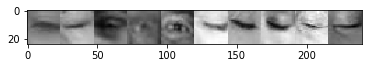

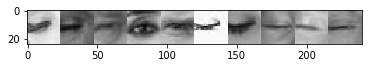

In [53]:
plt.imshow(np.concatenate(Xview[:10], axis=1), cmap="gray")
plt.axis('off')
plt.show()
plt.imshow(np.concatenate(Xvalview[:10], axis=1), cmap="gray")
plt.axis('off')
plt.show()

3. implement a routine `train(X,Y,λ)` that
    - learns w from any given X, Y and λ, as specified in Algorithm 1
4. write a routine `predict(w,x)` that
    - uses the model with parameter vector w to predict outputs for data x: f(x) = hx, wi.
    - if x is a matrix instead of a vector, make one prediction for each row vector.
5. implement a routine `loss(y,pred)` that
    - computes the loss, i.e. outputs 1 if $sign(pred) \neq y$ and 0 otherwise (tip: $sign(pred) \neq= y$ is equivalent to $pred \cdot y \le 0$).
    - if y and pred are vectors,the losses should be computed for each component

In [ ]:
def train(X,y,reg=0):
    assert reg >= 0
    
    A = np.dot(X.T, X) + reg * np.eye(len(X.T))
    b = np.dot(X.T, y)
    w = np.linalg.solve(A, b)
    
    return w

def predict(w, x):
    return np.dot(x, w)

def loss(y, pred):
    return (y * pred <= 0).mean()

6. use Xtrn and Ytrn to learn a model (a weight vector w) without regularization (λ = 0)
7. compute the training error:
    - use the trained model (i.e. w) to predict values on Xtrn
    - compute the average of losses between the predicted values and the ground truth Ytrn
8. compute the validation error:
    - use the trained model (i.e. w) to predict values on Xval
    - compute the average of losses between the predicted values and the ground truth Yval
9. Compare the training and the validation error. What do you think you see? Overfitting, underfitting or neither?

In [ ]:
# TODO

## Exercise 2 – Model Selection: Regularization

1. repeat the above steps of training and evaluation for $\lambda \in A$ for $A = \{2^{−20}, 2^{−19}, \dots, 2^{20}\}$
2. plot a graph with $\lambda$ on the x-axis (in logarithmic units) and training and validation error on the y axis. What do you observe?
3. write a routine `modelselect(Xtrn, Ytrn, Xval, Yval, A)` that automatizes the above steps and returns the value of λ with smallest validation error and the validation error itself. Print a warning if the largest or smallest value in A is selected.

In [ ]:
def modelselect(Xt,yt,Xv,yv,regs):
    losses_t = np.zeros((len(regs),))
    losses_v = np.zeros((len(regs),))

    for i, reg in enumerate(regs):
        w    = train(Xt, yt, reg)
        losses_t[i] = loss(yt, predict(w, Xt))
        losses_v[i] = loss(yv, predict(w, Xv))
        
    i_best = np.argmin(losses_v)
    
    return train(Xt, yt, reg=regs[i_best]), losses_t,\
           losses_v

4\. run the modelselect routine on the training/validation data and confirm that the output coincides with the location of the minimum in the plot.

5\. (optional) identify the 5 validation examples with highest score and the 5 validation examples with lowest score. Find and visualize the corresponding input images (you’ll have to convert them from 576-dimensional vectors to 24×24 image for that). What do you see?

In [ ]:
regs = 2**np.linspace(-20, 20, 100)

w,lt,lv = modelselect(Xt,yt,Xv,yv,regs)
best_loss = loss(yv, predict(w, Xv))

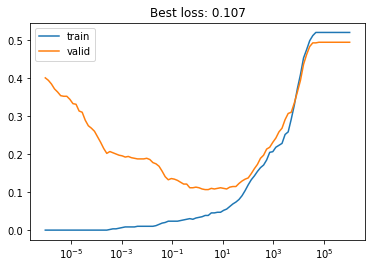

In [47]:
plt.figure(figsize=(10,8))

plt.plot(regs, lt, label="train")
plt.plot(regs, lv, label="valid")
plt.legend()

plt.title("Best loss: {:.3f}".format(best_loss))
plt.xscale("log")
plt.xlabel("")
plt.ylabel("Loss")
plt.show()

## Exercise 3 – Model Evaluation
1. before going on, decide on a single model that you believe is the best one.
2. load the test data from the files ”Xtest.txt”, and the ground truth labels ”Ytest.txt”.
3. compute the test error of the model you selected. Is the results similar to the validation error? If yes, congratulations!

In [49]:
print("Test Error: {:.3f}".format(
        loss(ytest, predict(w, Xtest))
        ))

Test Error: 0.083


## Exercise 4 – Distribution Mismatch

1. load the data files "Xval2.txt" and "Yval2.txt". They data contained are also eye images, but of right eyes, where the for the previous exercises is was left eyes.
2. take the model you trained before and evaluate how well it works on the new images. What do you observe?

In [51]:
print("Right Eyes Set: {:.3f}".format(
        loss(yval2, predict(w, Xval2))
        ))

Right Eyes Set: 0.264


3\. Optional: Imagine that you would have known in advance that the training data are only left eyes but that the test data are both left and right eyes. Can you think of a way to overcome/reduce the problem? If yes: implement your idea, do all necessary model selection steps etc, until you have a new model. Then evaluate it on the files "Xtest2.txt" and "Ytest2.txt".

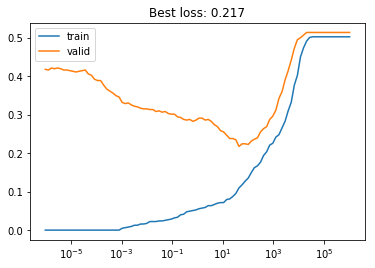

Right Eyes Set: 0.178


In [93]:
regs = 2**np.linspace(-20, 20, 100)

Xt_flipped = np.concatenate([Xt.reshape((-1,24,24))[...,::-1].reshape((-1,24*24))],axis=0)
yt_flipped = np.concatenate([yt],axis=0)

w,lt,lv = modelselect(Xt_flipped,yt_flipped,Xv,yv,regs)
    
plt.plot(regs, lt, label="train")
plt.plot(regs, lv, label="valid")
plt.legend()

best_loss = loss(yv, predict(w, Xv))
plt.title("Best loss: {:.3f}".format(best_loss))

plt.xscale("log")

plt.show()

print("Right Eyes Set: {:.3f}".format(
        loss(yval2, predict(w, Xval2))
        ))

## Exercise 5 – Adversarial examples

In this step we take an adversarial position and try to construct examples that to a human look like open eyes, but are misclassified as a closed eye (or vice versa).

1. start with an arbitrary open eye image, x, from the validation set
2. compute the model prediction, $f(x) = <w, x>$. We will assume that the classification is correct, i.e. $f(x) > 0$ (if not, use a different image)
3. our goal is to find a distortion, δ, such that when we add it to the image, the result (x + δ) is classified incorrectly, e.g. $f(x + \delta) < −1$. Can you derive such for perturbation δ with as small as possible L2-norm (treating the image like a vector)?
4. compute x + δ and visualize it. Does the result look like an open or a closed eye?
5. in light of the closed-form expression you derived, discuss the role of the regularization parameter for the construction of adversarial images.
6. derive the expression for δ that has the smallest L∞ norm, or the smallest L1 norm. Visualize the δ perturbations for the three different norms, as well as the corresponding perturbed images x + δ. Which of them looks most natural? Which of the perturbations is "most dangerous"?
7. discuss: how to make a method robust to adversarial perturbations?

619
(1, 1)


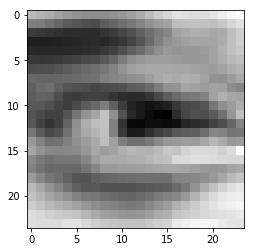

In [96]:
pred = predict(w, Xt) > 1

print((abs(pred) < 1).sum())

sample = Xt[(np.squeeze(yt) == 1) & \
            (np.squeeze(pred) == 1)][-1]

y_sample = predict(w, sample[np.newaxis,:])

print(y_sample.shape)
#assert y_sample == 1

plt.imshow(sample.reshape((24,24)),cmap="gray")

In [ ]:
λ = (0.5 + np.dot(sample, w)) / np.dot(w.T, w).reshape((-1))
δ = np.squeeze(-λ * w)

predict(w, (sample + δ)[np.newaxis,:])

(576,)
(576,) (1,) (576,)


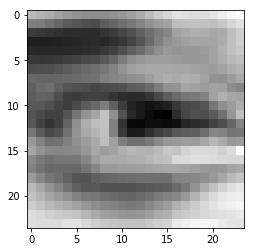

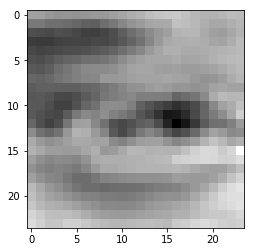

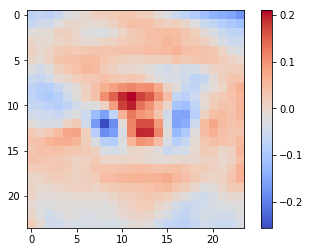

In [98]:
fig, axes = plt.subplots(1,3,figsize=(10,3))

samples = [sample, sample + δ, δ]
titles  = ['Original', 'Adversarial', 'Pertubation']

for ax, im, title in zip(axes, samples, titles):
    ax.imshow(im.reshape(24,24),cmap="gray")
    ax.set_title(title)
    plt.show()